In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_mlp = pd.read_csv("df_guai_lsa.csv")

In [3]:
df_mlp

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Guaiol
0,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.444444
1,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.444444
2,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.444444
3,2,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0.444444
4,2,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42969,0.109738,-0.066611,-0.064934,0.145920,-0.069040,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.222222
74996,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.222222
74997,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.222222
74998,42976,0.270141,-0.004631,-0.151272,0.035538,0.083641,0,1,0,0,...,1,1,1,1,1,1,1,1,1,0.222222


In [4]:
df_mlp.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

In [5]:
X = df_mlp.drop(['index', 'X..Guaiol'], axis = 1)
y = df_mlp[['X..Guaiol']]

<AxesSubplot:ylabel='Count'>

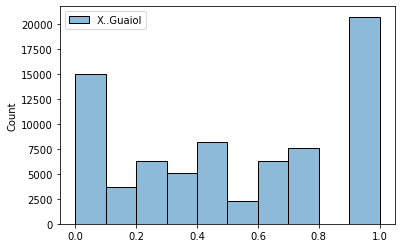

In [6]:
sns.histplot(y, bins = 10)

Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

MLP modeling (before Feature selection and Hyperparameter Tuning)

In [9]:
mlpreg = MLPRegressor(random_state=1, early_stopping=True)
mlpreg.fit(X_train1, y_train1)
y_pred_mlp = mlpreg.predict(X_val)
y_pred_mlp_r2 = mlpreg.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
mean_absolute_error(y_val, y_pred_mlp)

0.1434132281204165

In [11]:
#train
r2_score(y_train1, y_pred_mlp_r2)

0.7859283034664962

In [12]:
#val
r2_score(y_val, y_pred_mlp)

0.7021729148622922

Residual plots for each target variable

Feature Selection

In [13]:
rfreg = RandomForestRegressor()

In [14]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [15]:
selector.estimator_.feature_importances_

array([7.41346008e-02, 6.68297505e-02, 7.26237760e-02, 7.22350873e-02,
       7.04337155e-02, 3.89108000e-02, 0.00000000e+00, 3.53253436e-01,
       2.32425653e-04, 2.13067419e-03, 3.42532423e-03, 1.11953148e-07,
       8.39796562e-03, 1.45773405e-04, 2.84842714e-03, 4.40753616e-03,
       6.95205862e-03, 5.08837803e-03, 1.45043441e-07, 7.96500037e-03,
       3.70385732e-07, 1.59700488e-07, 9.52484588e-03, 8.14682198e-03,
       5.61616392e-03, 2.77581008e-03, 5.42464299e-03, 2.42009275e-04,
       4.59626020e-07, 2.25667931e-03, 5.87382947e-03, 5.04426084e-07,
       7.37609379e-03, 0.00000000e+00, 0.00000000e+00, 4.28128623e-03,
       4.28370013e-03, 6.98140771e-03, 1.73165784e-03, 1.00678267e-04,
       6.98706889e-05, 4.41022235e-03, 1.01872643e-04, 1.65347306e-02,
       1.30301479e-04, 1.27310733e-03, 5.54461556e-04, 2.20065532e-04,
       8.92686185e-03, 1.61709918e-03, 9.65306159e-03, 1.25804683e-02,
       2.79883878e-03, 1.99936080e-03, 3.68358048e-03, 3.85984609e-04,
      

In [16]:
selector.threshold_

0.011627906976744186

In [17]:
mask = selector.get_support()

In [18]:
mask

array([ True,  True,  True,  True,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [19]:
selected_features = X.columns[mask]

In [20]:
selected_X = df_mlp[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,sativa,blueberry,earthy,lemon
0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,0
1,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,0
2,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,0
3,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0,0
4,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
74995,0.109738,-0.066611,-0.064934,0.145920,-0.069040,0,0,0,0,0
74996,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,0,0,0,0
74997,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,0,0,0,0
74998,0.270141,-0.004631,-0.151272,0.035538,0.083641,0,0,1,1,1


In [21]:
selected_X.columns.to_list()

['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'sativa',
 'blueberry',
 'earthy',
 'lemon']

In [22]:
import joblib

joblib.dump(selector, "selector_mlp_lsa_elbow_guai.pkl")
joblib.dump(selected_X, "selected_X_mlp_lsa_elbow_guai.pkl")

['selected_X_mlp_lsa_elbow_guai.pkl']

In [23]:
# import joblib

# selected_X = joblib.load("selected_X_mlp_lsa_elbow_guai.pkl")

Train test split (after Feature Selection)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [25]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [26]:
mlpreg.fit(X_train1, y_train1)
y_pred_mlpreg = mlpreg.predict(X_val)
y_pred_mlpreg_r2 = mlpreg.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
mean_absolute_error(y_val, y_pred_mlpreg)

0.2144492045244107

In [28]:
#train
r2_score(y_train1, y_pred_mlpreg_r2)

0.4997863793164007

In [29]:
#val
r2_score(y_val, y_pred_mlpreg)

0.48523616676985426

Hyperparameter Tuning

In [30]:
parameters = {'hidden_layer_sizes': [(100,), (50, 50, 50), (50, 100, 50)],
              'activation': ['tanh', 'relu'], #only tanh and relu
              'max_iter': [200, 500, 1000]
              }

In [31]:
rscv = RandomizedSearchCV(mlpreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs=-1)

In [32]:
rscv.fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_netwo

RandomizedSearchCV(cv=5,
                   estimator=MLPRegressor(early_stopping=True, random_state=1),
                   n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'hidden_layer_sizes': [(100,),
                                                               (50, 50, 50),
                                                               (50, 100, 50)],
                                        'max_iter': [200, 500, 1000]},
                   scoring='neg_mean_absolute_error')

In [33]:
rscv.best_params_

{'max_iter': 200, 'hidden_layer_sizes': (50, 100, 50), 'activation': 'relu'}

In [34]:
joblib.dump(rscv, "rscv_mlp_lsa_elbow_guai.pkl")
joblib.dump(rscv.best_params_, "rscv_mlp_lsa_elbow_best_params_guai.pkl")

['rscv_mlp_lsa_elbow_best_params_guai.pkl']

MLP fit (after hyperparameter tuning)

In [35]:
mlpreg_ht = MLPRegressor(random_state=1, max_iter=200, activation = 'relu', hidden_layer_sizes= (50,100,50), early_stopping=True)
mlpreg_ht.fit(X_train1, y_train1)
y_pred_mlp_ht = mlpreg_ht.predict(X_val)
y_pred_mlp_r2_ht = mlpreg_ht.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
mean_absolute_error(y_val, y_pred_mlp_ht)

0.16603737859281997

In [37]:
#train
r2_score(y_train1, y_pred_mlp_r2_ht)

0.7095914792842917

In [38]:
#val
r2_score(y_val, y_pred_mlp_ht)

0.6510481069948243

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [39]:
y_pred_mlpreg_test = mlpreg_ht.predict(X_test)

In [40]:
joblib.dump(y_pred_mlpreg_test, "y_pred_mlpreg_test_lsa_elbow_guai.pkl")
joblib.dump(y_test, "y_test_mlpreg_lsa_elbow_guai.pkl")

['y_test_mlpreg_lsa_elbow_guai.pkl']

In [41]:
mean_absolute_error(y_test, y_pred_mlpreg_test)

0.16248011264541115

In [42]:
mean_squared_error(y_test, y_pred_mlpreg_test)

0.047122442606630524

In [43]:
mean_squared_error(y_test, y_pred_mlpreg_test, squared = False)

0.21707704302074535

In [44]:
r2_score(y_test, y_pred_mlpreg_test)

0.6726240077476233

Error analysis

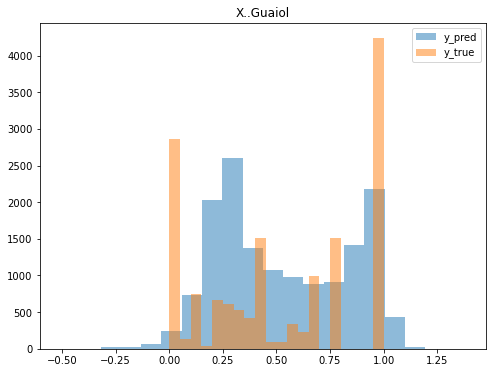

<Figure size 432x288 with 0 Axes>

In [45]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Guaiol"  # specify the target variable name
ax.hist(y_pred_mlpreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_mlp_lsa_elbow_guai.png')

Pearson R

In [46]:
corr_coef, p_value = pearsonr(y_pred_mlpreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.820
P-value: 0.000


<AxesSubplot:>

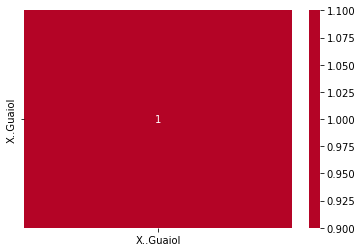

In [47]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)